# HW 5

In this exercise, we want to classify images with neural networks by TensorFlow and Keras frameworks.

First you should analayze the following code which is a sample code from TensorFlow official site. 

https://www.tensorflow.org/tutorials/keras/classification

Then you should implement your code for classification of Mnist dataset.

Note that the following code is only implemented with sequential approach. You should implement your code with both sequential and functional approaches.

## Basic classification: Classify images of clothing

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details

In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten, Softmax

### Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels).

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and [load the Fashion MNIST data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directly from TensorFlow:

In [2]:
labels_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In the following cells, you can information about this dataset:

In [4]:
print(f'x_train : {x_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'x_test : {x_test.shape}')
print(f'y_test : {y_test.shape}')

x_train : (60000, 28, 28)
y_train : (60000,)
x_test : (10000, 28, 28)
y_test : (10000,)


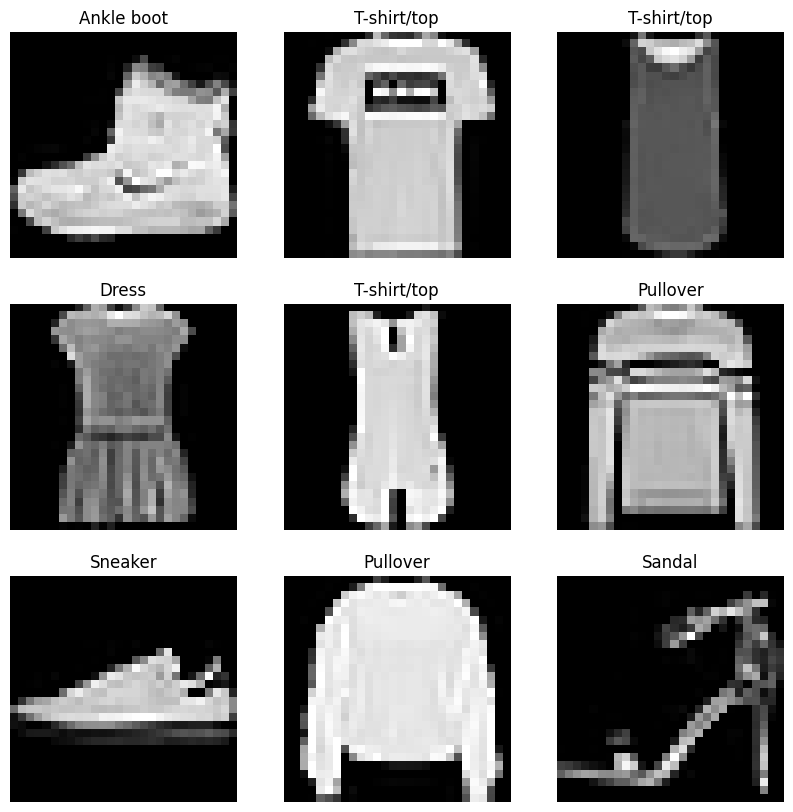

In [5]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].astype("uint8"),cmap='gray')
    plt.title(class_names[int(y_train[i])])
    plt.axis("off")

In [6]:
print(f'y_train[0]: {y_train[0]}')

y_train[0]: 9


### Preprocess the data

You can normalize your data to improve the training performance.

note that it's important that the training set and the testing set be preprocessed in the same way:

In [7]:
x_train = x_train/ 255.0
x_test = x_test / 255.0

### Build the model

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [8]:
seq_model = Sequential()
seq_model.add(Input(shape= (28,28)))
seq_model.add(Flatten())
seq_model.add(Dense(units=128, activation='relu'))
seq_model.add(Dense(units=10))

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.





In [9]:
seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) step:

* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [10]:
seq_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


#### Feed the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

In [11]:
history = seq_model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4978 - accuracy: 0.8259
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3783 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3398 - accuracy: 0.8759
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3142 - accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2963 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2797 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2689 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2593 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2476 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

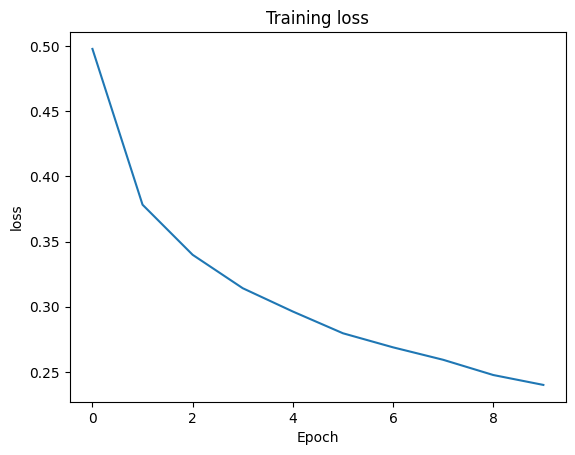

In [12]:
plt.plot(history.history['loss'])
plt.title('Training loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()

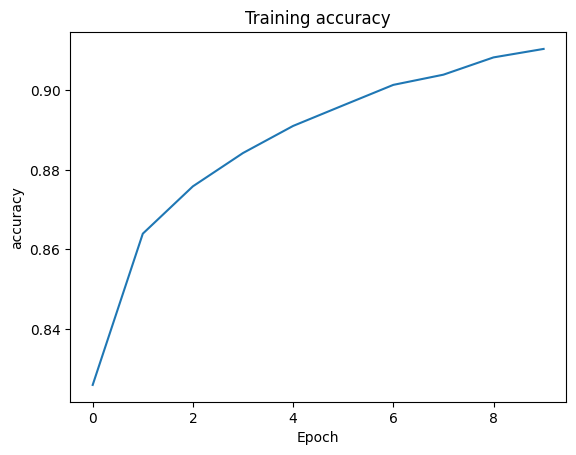

In [13]:
plt.plot(history.history['accuracy'])
plt.title('Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show()

#### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [14]:
test_loss, test_acc = seq_model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3295 - accuracy: 0.8867 - 588ms/epoch - 2ms/step

Test accuracy: 0.8866999745368958


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data.

#### Make predictions

With the model trained, you can use it to make predictions about some images.
Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.

In [15]:
probability_model = tf.keras.Sequential([seq_model, Softmax()])

In [16]:
y_pred = probability_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [17]:
y_pred[0]

array([9.0413357e-09, 3.2423350e-10, 1.7510678e-10, 9.4891783e-10,
       8.7406825e-08, 2.4573749e-03, 2.1263650e-08, 2.2001103e-03,
       9.3016350e-09, 9.9534231e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

label : 9 and class : Ankle boot


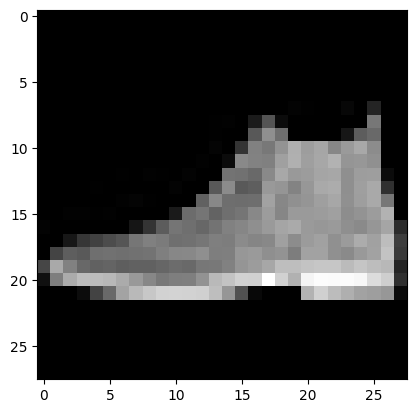

In [18]:
plt.imshow(x_test[0],cmap='gray')
label = np.argmax(y_pred[0])
print(f'label : {label} and class : {class_names[label]}')

## Basic classification: Classify images of handwritten digits

In this section you should design a neural network arcitecutre and train it on [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. note that you should implent your arcitecutre with both sequential and functional approachs. we have already implemented a network with sequential approach on Fashion Mnist dataset. You can read more about functional approach in [this link](https://www.tensorflow.org/guide/keras/functional).
  

You can use [this link](https://keras.io/api/datasets/mnist/) for loading Mnist dataset. 

You should also implement all the prior steps for this dataset. 

In [19]:
# loading mnist dataset to RAM. It is available at keras.datasets and we can get it using load_data method.
# The data contains two tuples containing training data and labels and testing data and labels.

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [20]:
# defining data labels so we can convert numeric values to human-friendly output.

label_names = ['Zero', 'One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

In [21]:
# As we see the images are 28 * 28 pixel and the total of 70000 data records are split into training and test.

print(f'x_train : {x_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'x_test : {x_test.shape}')
print(f'y_test : {y_test.shape}')

x_train : (60000, 28, 28)
y_train : (60000,)
x_test : (10000, 28, 28)
y_test : (10000,)


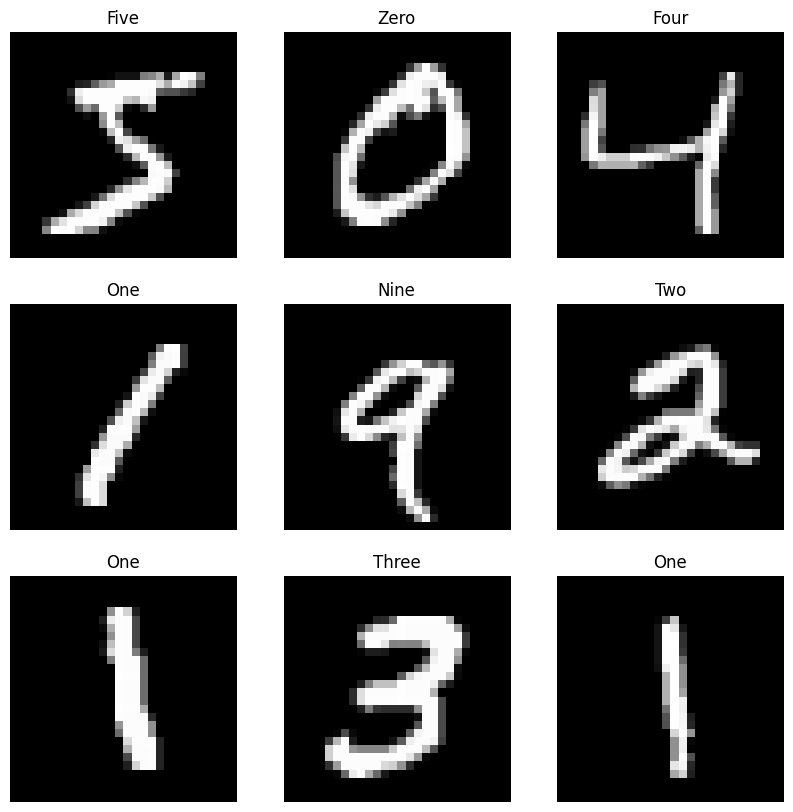

In [22]:
# We plot the first 9 records of training data to visualize some examples of data with their labels.

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].astype("uint8"),cmap='gray')
    plt.title(label_names[int(y_train[i])])
    plt.axis("off")

In [23]:
# values of the first 9 records labels

print(f'y_train[0]: {y_train[0]}')
print(f'y_train[1]: {y_train[1]}')
print(f'y_train[2]: {y_train[2]}')
print(f'y_train[3]: {y_train[3]}')
print(f'y_train[4]: {y_train[4]}')
print(f'y_train[5]: {y_train[5]}')
print(f'y_train[6]: {y_train[6]}')
print(f'y_train[7]: {y_train[7]}')
print(f'y_train[8]: {y_train[8]}')

y_train[0]: 5
y_train[1]: 0
y_train[2]: 4
y_train[3]: 1
y_train[4]: 9
y_train[5]: 2
y_train[6]: 1
y_train[7]: 3
y_train[8]: 1


In [24]:
# We normalize pixel values of the images. This helos better performance and convergence for our model.

x_train = x_train / 255.0
x_test = x_test / 255.0

## Sequential approach

In [25]:
# We then define our sequential model and add the necessary layers to it.

seq_model = Sequential() # initializing sequential model object. This is a linear stack of layers.
seq_model.add(Input(shape=(28,28))) # adding input layer
seq_model.add(Flatten()) # the Flatten layer reshapes the input data from a 2D array (image) into a 1D array (vector)
seq_model.add(Dense(units=128, activation='relu')) # adding a fully connected layer to our model. the layer has 128 neurons and sets ReLU as the activation function to add some non-linearity to the network
seq_model.add(Dense(units=10)) # output layer which classifies out data

In [26]:
# getting base info of the model such as parameter count and layer type

seq_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [27]:
# compile the model. Actually setting the optimizer and loss function and the metric that we expect from the model. 

seq_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # the from_logits=True argument indicates that the model's output is not passed through a softmax activation function before calculating the loss
              metrics=['accuracy'])

In [28]:
# fitting the model based on training data and labels for 10 epochs and saving the result in history var

seq_model_history = seq_model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2550 - accuracy: 0.9277
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1125 - accuracy: 0.9669
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0774 - accuracy: 0.9770
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0591 - accuracy: 0.9818
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0449 - accuracy: 0.9860
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0357 - accuracy: 0.9891
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0281 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0235 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0189 - accuracy: 0.9944
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.016

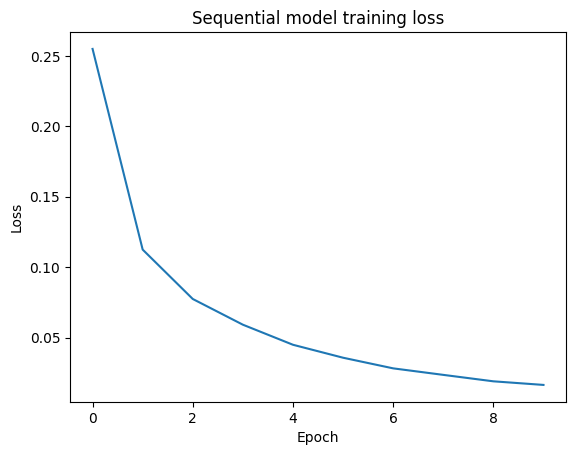

In [29]:
# getting loss values from history var and plotting it

plt.plot(seq_model_history.history['loss'])
plt.title('Sequential model training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

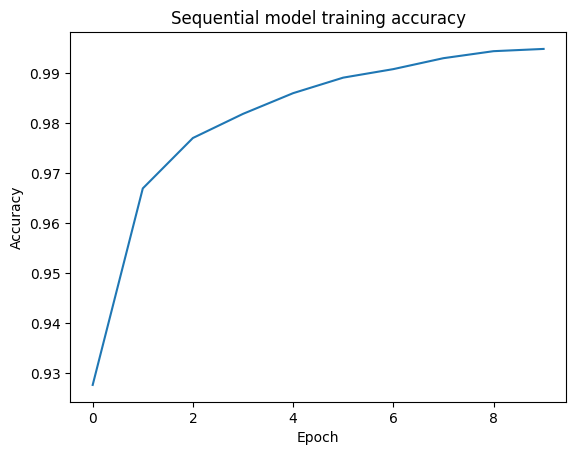

In [30]:
# getting loss values from history var and plotting it

plt.plot(seq_model_history.history['accuracy'])
plt.title('Sequential model training accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [31]:
# the evaluate function uses testing data and labels to calculate model's loss and accuracy

test_loss, test_acc = seq_model.evaluate(x_test, y_test, verbose=2) # verbose when set to 2, provides detailed information about the evaluation process, including the loss value

print('Sequential model test accuracy:', test_acc)

313/313 - 1s - loss: 0.0801 - accuracy: 0.9773 - 604ms/epoch - 2ms/step
Sequential model test accuracy: 0.9772999882698059


In [32]:
# adding a softmax function to get output as probability values

probability_model = tf.keras.Sequential([seq_model, Softmax()])

In [33]:
# calculate prediction on data

y_pred = probability_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [34]:
# example

y_pred[0]

array([1.1828880e-11, 1.4344469e-13, 1.0920903e-09, 4.0174309e-06,
       6.1462447e-15, 8.8532438e-11, 6.2980295e-14, 9.9999577e-01,
       9.7031971e-10, 6.4746246e-08], dtype=float32)

label : 7 and class : Seven


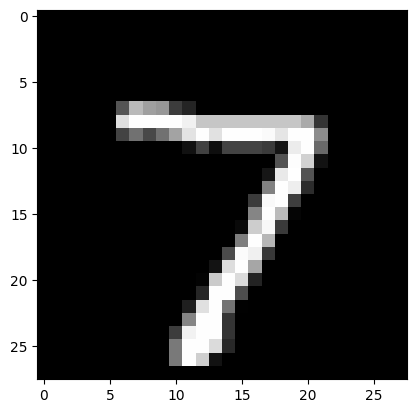

In [35]:
# true prediction of number 7 image

plt.imshow(x_test[0],cmap='gray')
label = np.argmax(y_pred[0])
print(f'label : {label} and class : {label_names[label]}')

## Functional Approch

This is so similar to the previous part but the model is different. As you see the layer is constructed using a number of functions where each layer's output is the input to the next layer.
The function call fetches a layer and then attaches it to the next layer to complete the model.
Accuracies of the models are nearly the same.

In [36]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [37]:
label_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

In [38]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [39]:
input_layer = Input(shape=(28, 28))

In [40]:
flatten = Flatten()(input_layer)

In [41]:
dense1 = Dense(units=128, activation='relu')(flatten)
output = Dense(units=10)(dense1)

In [42]:
func_model = Model(inputs=input_layer, outputs=output)

In [43]:
func_model.compile(optimizer='adam',
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy'])

In [44]:
func_model_history = func_model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2627 - accuracy: 0.9247
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1158 - accuracy: 0.9659
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0782 - accuracy: 0.9765
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0570 - accuracy: 0.9829
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0453 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0349 - accuracy: 0.9892
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0284 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0221 - accuracy: 0.9932
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0187 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0

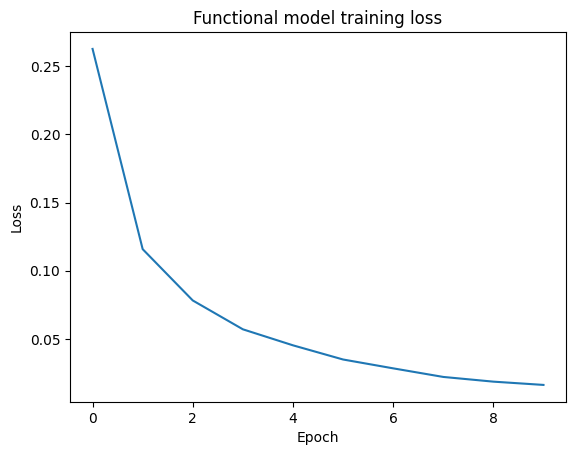

In [45]:
plt.plot(func_model_history.history['loss'])
plt.title('Functional model training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

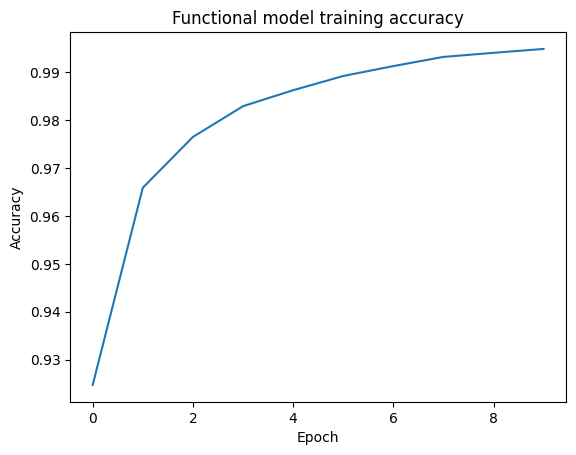

In [46]:
plt.plot(func_model_history.history['accuracy'])
plt.title('Functional model training accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [47]:
test_loss, test_acc = func_model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0754 - accuracy: 0.9803 - 602ms/epoch - 2ms/step


In [48]:
print('Functional model test accuracy:', test_acc)

Functional model test accuracy: 0.9803000092506409


In [49]:
y_pred = func_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


label: 7 and class: Seven


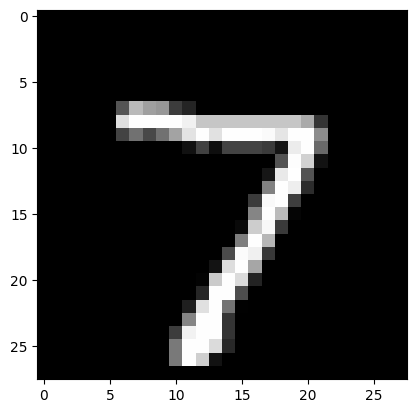

In [50]:
plt.imshow(x_test[0], cmap='gray')
label = np.argmax(y_pred[0])
print(f'label: {label} and class: {label_names[label]}')